In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from keras.datasets import mnist

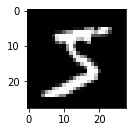

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train/255
x_test = x_test/255

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [5]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [6]:
for i in range(9):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
model = tf.keras.Sequential()

BatchNormalization()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D())
BatchNormalization()
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D())
BatchNormalization()
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(10,activation="softmax"))

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               819712    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2788 - accuracy: 0.9120
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0450 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0221 - accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0167 - accuracy: 0.9949


In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0261 - accuracy: 0.9930


[0.026102783158421516, 0.9929999709129333]

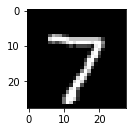

In [12]:
plt.subplot(221)
plt.imshow(x_test[0].reshape(28,28), cmap=plt.get_cmap('gray'))

In [13]:
probability_model = tf.keras.Sequential([model])

In [14]:
predictions = probability_model.predict(x_test)

In [15]:
print(predictions[0])
np.argmax(predictions[0])

[1.3828419e-11 2.6815860e-11 1.5093557e-10 2.4252614e-10 5.8475308e-12
 9.3232402e-14 3.8498787e-15 1.0000000e+00 2.5755479e-11 8.2396512e-10]


7

In [16]:
for i in range(9):
  print(np.argmax(predictions[i]))

7
2
1
0
4
1
4
9
5


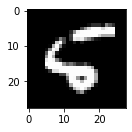

In [17]:
plt.subplot(221)
plt.imshow(x_test[8].reshape(28,28), cmap=plt.get_cmap('gray'))